In [90]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [105]:
folder_path = "../data/"

file_paths = sorted(glob.glob(os.path.join(folder_path, "wind_speed_result*.txt")))

all_data = []

for file_path in file_paths:
    df = pd.read_csv(
        file_path,
        comment="#",
        header=None,
        names=["station", "date", "wind_speed"],
        na_values=[" ", "", "NaN"]
    )
    #Convert to numeric
    df["wind_speed"] = pd.to_numeric(df["wind_speed"], errors="coerce")
    # Only keep valid rows
    df = df.dropna(subset=["wind_speed"])
    #Convert to m/s (before was 0.1 m/s)
    df["wind_speed"] = df["wind_speed"] * 10.0

    # Convert date to string and extract YYYY-MM
    df["date"] = df["date"].astype(str)
    df["date_datetime"] = pd.to_datetime(df["date"])
    df["year_month"] = df["date_datetime"].dt.strftime("%Y-%m")

    all_data.append(df)

# Combine all data
combined = pd.concat(all_data)

monthly_avg = combined.groupby(combined["year_month"])["wind_speed"].mean().reset_index()

output_path = os.path.join(folder_path, "monthly_national_avg_wind_speed.csv")
monthly_avg.to_csv(output_path, index=False)
# 
print(f"Saved monthly averages to: {output_path}")

Saved monthly averages to: ../data/monthly_national_avg_wind_speed.csv


Saved monthly averages to: ../data/monthly_national_avg_wind_speed.csv


Saved monthly averages to: ../data/monthly_national_avg_wind_speed.csv


In [101]:
folder_path = ""
output_path = os.path.join(folder_path, "monthly_national_avg_wind_speed.csv")
monthly_avg.to_csv(output_path, index=False)

In [94]:
pd.to_datetime(combined["date"]).dt.strftime("%Y-%m").unique()

array(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
       '2025-01', '2025-02', '2025-03', '2025-04', '2025-05'],
      dtype=object)

array(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
       '2025-01', '2025-02', '2025-03', '2025-04', '2025-05'],
      dtype=object)

In [99]:
monthly_avg

year_month
2019-01    560.161290
2019-02    482.903727
2019-03    646.472651
2019-04    479.949275
2019-05    449.354839
              ...    
2025-01    488.306166
2025-02    462.795950
2025-03    386.313202
2025-04    401.528986
2025-05    208.260870
Name: wind_speed, Length: 77, dtype: float64

year_month
2019-01    560.161290
2019-02    482.903727
2019-03    646.472651
2019-04    479.949275
2019-05    449.354839
              ...    
2025-01    488.306166
2025-02    462.795950
2025-03    386.313202
2025-04    401.528986
2025-05    208.260870
Name: wind_speed, Length: 77, dtype: float64

In [16]:
%matplotlib inline

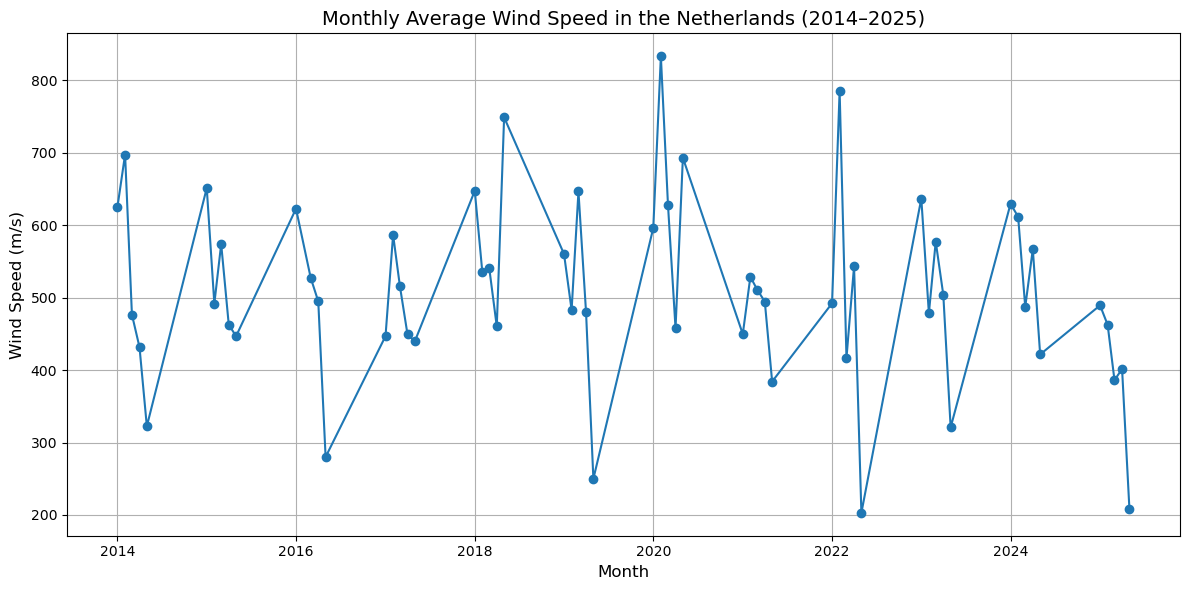

In [17]:
df = pd.read_csv("../data/monthly_national_avg_wind_speed.csv")


df["year_month"] = pd.to_datetime(df["year_month"], format="%Y-%m")


plt.figure(figsize=(12, 6))
plt.plot(df["year_month"], df["wind_speed"], marker='o', linestyle='-')


plt.title("Monthly Average Wind Speed in the Netherlands (2014–2025)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()